In [1]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib as mpl

In [2]:
mpl.rc('figure', figsize=(6.64, 6.64*0.74), dpi=100)
mpl.rc('figure.subplot', left=0.15, right=0.95, bottom=0.15, top=0.92)
mpl.rc('lines', linewidth=1.75, markersize=8.0, markeredgewidth=0.75)
# mpl.rc('font', size=18.0, family="serif", serif="CM")
mpl.rc('font', size=18.0)
mpl.rc('xtick', labelsize='small')
mpl.rc('ytick', labelsize='small')
mpl.rc('xtick.major', width=1.0, size=8)
mpl.rc('ytick.major', width=1.0, size=8)
mpl.rc('xtick.minor', width=1.0, size=4)
mpl.rc('ytick.minor', width=1.0, size=4)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize='small', numpoints=1, labelspacing=0.4, frameon=False)
mpl.rc('text', usetex=True)
mpl.rc('savefig', dpi=300)

In [6]:
data = Table.read("sim_output-v2.csv")

In [7]:
data['e'] = data['beam_maj']/data['beam_min']

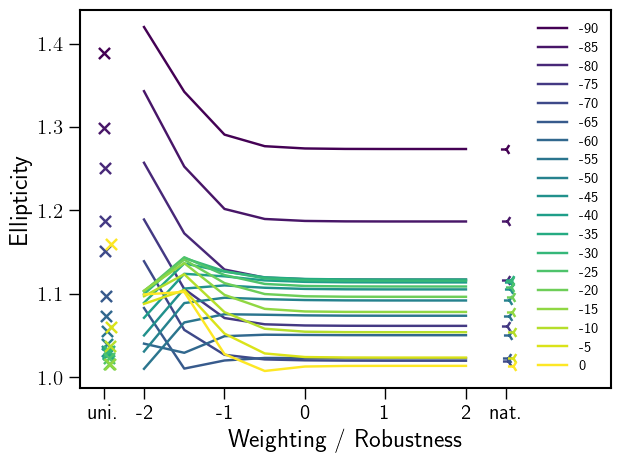

In [8]:
cm_subsection = np.linspace(0., 1., len(np.unique(data['dec'])))
colors = [ cm.viridis(x) for x in cm_subsection ]

for i, dec in enumerate(np.unique(data['dec'])):
    cond = data['dec'] == dec
    plt.plot(data[cond]['robust'][1:-1], data[cond]['e'][1:-1], color=colors[i], label=dec)
    plt.scatter([-2.5 + i*0.005], data[cond]['e'][0], color=colors[i], marker="x")
    plt.scatter([2.5 + i*0.005], data[cond]['e'][-1], color=colors[i], marker="3")
plt.xlim([-2.8, 3.8])
plt.xlabel("Weighting / Robustness")
plt.ylabel("Ellipticity")
plt.xticks([-2.5, -2, -1, 0, 1, 2, 2.5], ["uni.", "-2", "-1", "0", "1", "2", "nat."])
plt.legend(fontsize="xx-small")

plt.savefig("ellipticity_weight_dec.png")

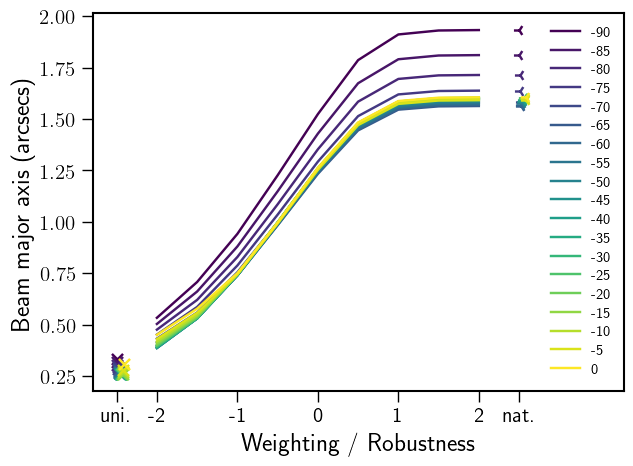

In [10]:
cm_subsection = np.linspace(0., 1., len(np.unique(data['dec'])))
colors = [ cm.viridis(x) for x in cm_subsection ]

for i, dec in enumerate(np.unique(data['dec'])):
    cond = data['dec'] == dec
    plt.plot(data[cond]['robust'][1:-1], data[cond]['beam_maj'][1:-1], color=colors[i], label=dec)
    plt.scatter([-2.5 + i*0.005], data[cond]['beam_maj'][0], color=colors[i], marker="x")
    plt.scatter([2.5 + i*0.005], data[cond]['beam_maj'][-1], color=colors[i], marker="3")
plt.xlim([-2.8, 3.8])
plt.xlabel("Weighting / Robustness")
plt.ylabel("Beam major axis (arcsecs)")
plt.xticks([-2.5, -2, -1, 0, 1, 2, 2.5], ["uni.", "-2", "-1", "0", "1", "2", "nat."])
plt.legend(fontsize="xx-small")

plt.savefig("bmaj_weight_dec.png")

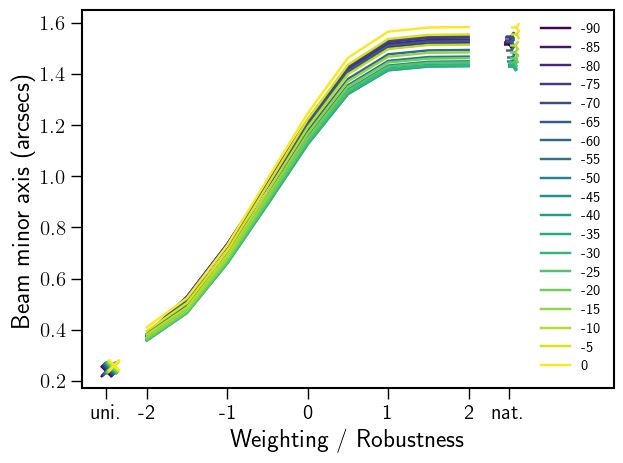

In [11]:
cm_subsection = np.linspace(0., 1., len(np.unique(data['dec'])))
colors = [ cm.viridis(x) for x in cm_subsection ]

for i, dec in enumerate(np.unique(data['dec'])):
    cond = data['dec'] == dec
    plt.plot(data[cond]['robust'][1:-1], data[cond]['beam_min'][1:-1], color=colors[i], label=dec)
    plt.scatter([-2.5 + i*0.005], data[cond]['beam_min'][0], color=colors[i], marker="x")
    plt.scatter([2.5 + i*0.005], data[cond]['beam_min'][-1], color=colors[i], marker="3")
plt.xlim([-2.8, 3.8])
plt.xlabel("Weighting / Robustness")
plt.ylabel("Beam minor axis (arcsecs)")
plt.xticks([-2.5, -2, -1, 0, 1, 2, 2.5], ["uni.", "-2", "-1", "0", "1", "2", "nat."])
plt.legend(fontsize="xx-small")

plt.savefig("bmin_weight_dec.png")

In [19]:
data['relsens'] = np.ones_like(data['sumwt'])
data['sens'] = np.zeros_like(data['sumwt'])
for dec in np.unique(data['dec']):
    cond = (data['dec'] == dec)
    sumwt_natural = data[cond & (data['weighting'] == 'natural')]['sumwt']
    sens_natural = 1/np.sqrt(sumwt_natural)
    data['sens'][cond] = 1/np.sqrt(data[cond]['sumwt'])
    data['relsens'][cond] = data[cond]['sens']/sens_natural

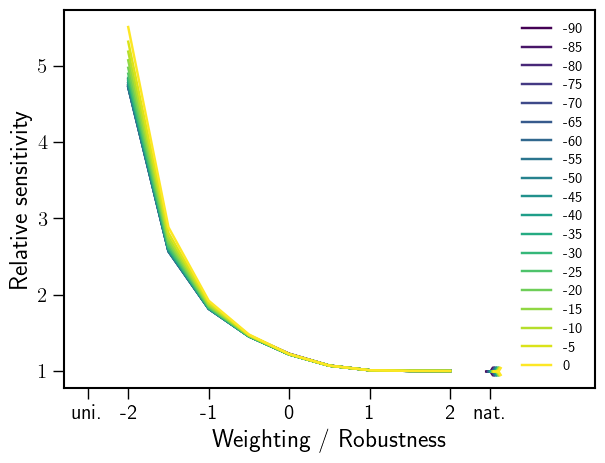

In [22]:
cm_subsection = np.linspace(0., 1., len(np.unique(data['dec'])))
colors = [ cm.viridis(x) for x in cm_subsection ]

for i, dec in enumerate(np.unique(data['dec'])):
    cond = data['dec'] == dec
    plt.plot(data[cond]['robust'][1:-1], data[cond]['relsens'][1:-1], color=colors[i], label=dec)
    #plt.scatter([-2.5 + i*0.005], data[cond]['relsens'][0], color=colors[i], marker="x")
    plt.scatter([2.5 + i*0.005], data[cond]['relsens'][-1], color=colors[i], marker="3")
plt.xlim([-2.8, 3.8])
plt.xlabel("Weighting / Robustness")
plt.ylabel("Relative sensitivity")
plt.xticks([-2.5, -2, -1, 0, 1, 2, 2.5], ["uni.", "-2", "-1", "0", "1", "2", "nat."])
plt.legend(fontsize="xx-small")

plt.savefig("relsens_weight_dec.png")